In [104]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [105]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset Info

In [106]:
bc.target[500]

np.int64(1)

In [107]:
bc.target.shape

(569,)

In [108]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [109]:
bc.data.shape

(569, 30)

# preprocessing

In [110]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(bc.data , bc.target, test_size=0.2)

In [111]:
print(f'feature=> train:{x_train.shape} test:{x_test.shape}')
print(f'lable=> train:{y_train.shape} test:{y_test.shape}')

feature=> train:(455, 30) test:(114, 30)
lable=> train:(455,) test:(114,)


In [112]:
x_train[0]

array([1.287e+01, 1.621e+01, 8.238e+01, 5.122e+02, 9.425e-02, 6.219e-02,
       3.900e-02, 1.615e-02, 2.010e-01, 5.769e-02, 2.345e-01, 1.219e+00,
       1.546e+00, 1.824e+01, 5.518e-03, 2.178e-02, 2.589e-02, 6.330e-03,
       2.593e-02, 2.157e-03, 1.390e+01, 2.364e+01, 8.927e+01, 5.975e+02,
       1.256e-01, 1.808e-01, 1.992e-01, 5.780e-02, 3.604e-01, 7.062e-02])

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [114]:
x_train[0]

array([0.25363632, 0.21981738, 0.24480501, 0.14665751, 0.31460006,
       0.13131096, 0.09146341, 0.08442237, 0.51462622, 0.16280539,
       0.04454101, 0.18945809, 0.03717665, 0.02136355, 0.12934698,
       0.14666386, 0.06537879, 0.11990907, 0.25395396, 0.04360654,
       0.19084862, 0.30970149, 0.1768085 , 0.09276995, 0.35944001,
       0.14893617, 0.15910543, 0.19862543, 0.4019318 , 0.10219074])

# classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_score(y_train, y_test, y_pred_test, y_pred_train):

    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')
    return acc_train, acc_test, p, r

## 1. naive bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [123]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.9384615384615385 - acc test: 0.9473684210526315 - precision:0.9459459459459459 - recall:0.9722222222222222


## 2. KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [125]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.9758241758241758 - acc test: 0.9912280701754386 - precision:1.0 - recall:0.9861111111111112


## 3. Decision tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, criterion='entropy', min_samples_split=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [127]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 1.0 - acc test: 0.9473684210526315 - precision:0.9583333333333334 - recall:0.9583333333333334


## 4. Random forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [130]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.9934065934065934 - acc test: 0.9912280701754386 - precision:0.9863013698630136 - recall:1.0


## 5. SVM

In [131]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [132]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.9802197802197802 - acc test: 1.0 - precision:1.0 - recall:1.0


## 6. logistic regression


In [133]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [134]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.967032967032967 - acc test: 0.9824561403508771 - precision:0.972972972972973 - recall:1.0


## 7. ANN

In [142]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)


c:\Users\JOKER\.virtualenvs\matchin-20scJ_PD\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [143]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_score(y_train, y_test, y_pred_test, y_pred_train)


acc train: 0.989010989010989 - acc test: 0.9912280701754386 - precision:0.9863013698630136 - recall:1.0


# Compirson

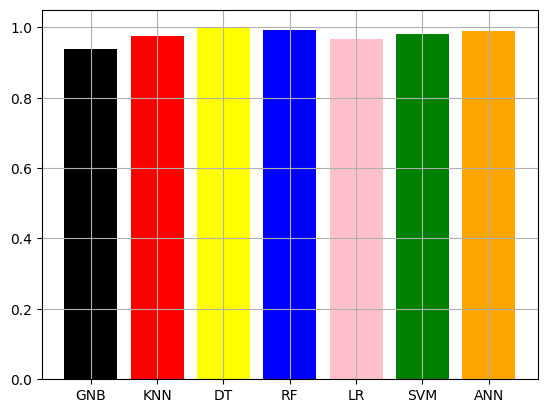

In [145]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_lr, acc_train_svm, acc_train_ann]
title = ['GNB','KNN','DT','RF', 'LR', "SVM",'ANN']
colors= ['black','red','yellow', 'blue','pink','green','orange']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

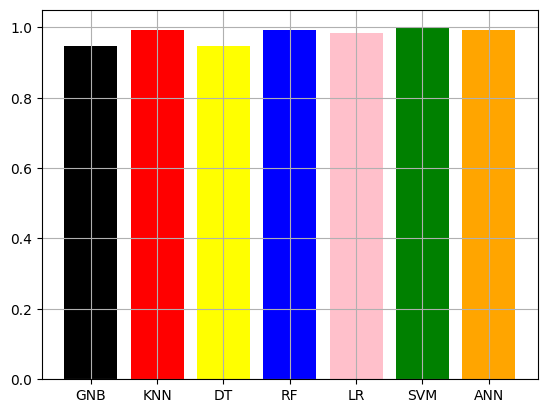

In [146]:
import matplotlib.pyplot as plt

acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_lr, acc_test_svm, acc_test_ann]
title = ['GNB','KNN','DT','RF', 'LR', "SVM",'ANN']
colors= ['black','red','yellow', 'blue','pink','green','orange']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

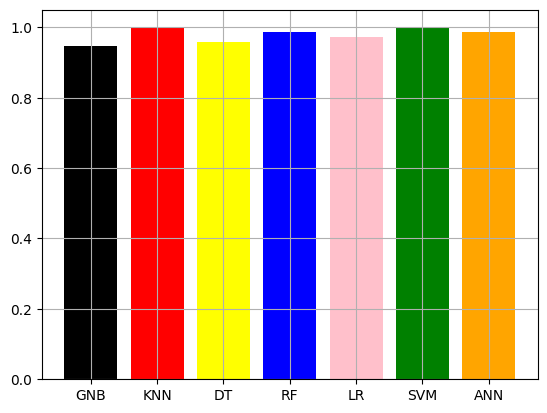

In [147]:
import matplotlib.pyplot as plt

p = [p_gnb, p_knn, p_dt, p_rf, p_lr, p_svm, p_ann]
title = ['GNB','KNN','DT','RF', 'LR', "SVM",'ANN']
colors= ['black','red','yellow', 'blue','pink','green','orange']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

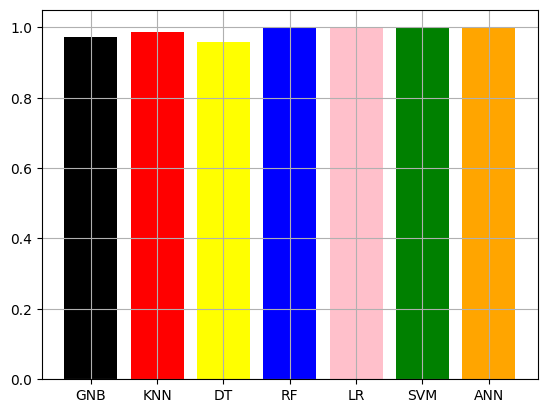

In [148]:
import matplotlib.pyplot as plt

r = [r_gnb, r_knn, r_dt, r_rf, r_lr, r_svm, r_ann]
title = ['GNB','KNN','DT','RF', 'LR', "SVM",'ANN']
colors= ['black','red','yellow', 'blue','pink','green','orange']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()